In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pipelines import NaiveBayesPipeline
import miceforest as mf
from feature_selection import FeatureSelector
import feature_selection
from outlier_detection import OutlierDetector
import outlier_detection


df = pd.read_csv('weatherAUStest.csv')
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [2]:
fs = FeatureSelector(X_train, y_train, task_type='classification')
fs.run_selection()

Running permutation feature selection...
Running symmetrical_uncertainty feature selection...
Running f_score feature selection...
Running jmim feature selection...
Running LASSO feature selection...
Running sequential feature selection...


c:\Users\GIRAFFE\anaconda3\envs\test\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


Running random_forest feature selection...


In [3]:
results_table = fs.get_results_table()
print(results_table)

              permutation symmetrical_uncertainty f_score jmim LASSO  \
Location                ✗                       ✗       ✗    ✓     ✓   
MinTemp                 ✓                       ✗       ✓    ✓     ✓   
MaxTemp                 ✓                       ✓       ✓    ✓     ✗   
Rainfall                ✓                       ✓       ✓    ✓     ✓   
WindGustDir             ✓                       ✗       ✗    ✓     ✓   
WindGustSpeed           ✓                       ✓       ✓    ✓     ✓   
WindDir9am              ✓                       ✓       ✗    ✓     ✓   
WindDir3pm              ✗                       ✓       ✓    ✓     ✓   
WindSpeed9am            ✗                       ✗       ✓    ✗     ✓   
WindSpeed3pm            ✗                       ✗       ✓    ✓     ✓   
Pressure9am             ✗                       ✓       ✓    ✓     ✓   
Pressure3pm             ✓                       ✓       ✓    ✓     ✓   
Temp9am                 ✗                       ✗       ✗    ✗  

In [4]:
count_table = fs.get_count()
print("Feature selection counts:")
print(count_table)

Feature selection counts:
               Count
Rainfall       7 / 7
Temp3pm        7 / 7
MinTemp        6 / 7
WindGustSpeed  6 / 7
Pressure3pm    6 / 7
RainToday      6 / 7
MaxTemp        5 / 7
WindDir9am     5 / 7
WindDir3pm     5 / 7
WindSpeed3pm   5 / 7
Pressure9am    5 / 7
WindSpeed9am   4 / 7
Location       3 / 7
WindGustDir    3 / 7
Temp9am        2 / 7


In [5]:
all_selected = fs.all_features_selected()
print("\nFeatures selected by all methods:", all_selected)


Features selected by all methods: ['Rainfall', 'Temp3pm']


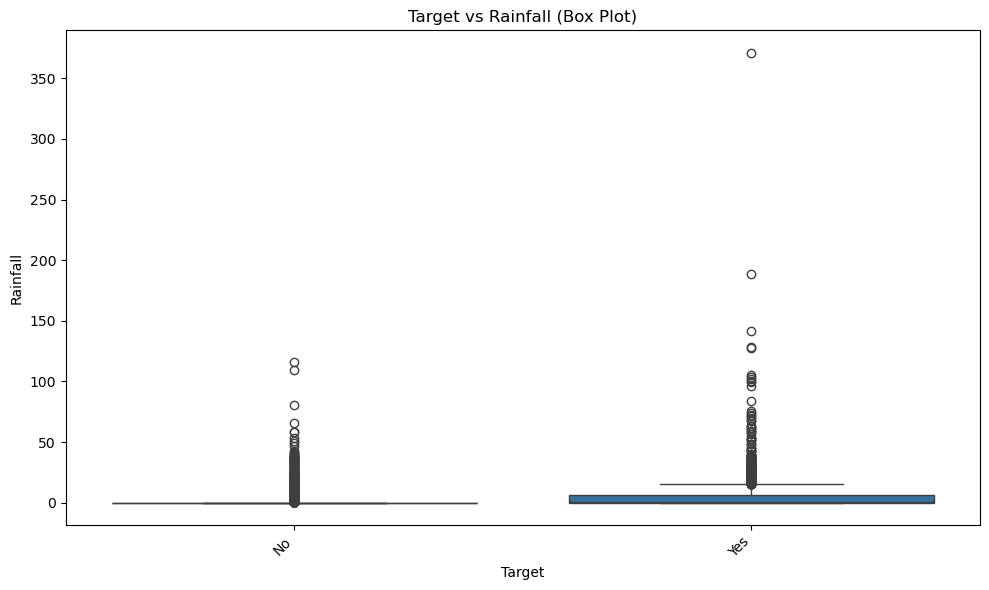

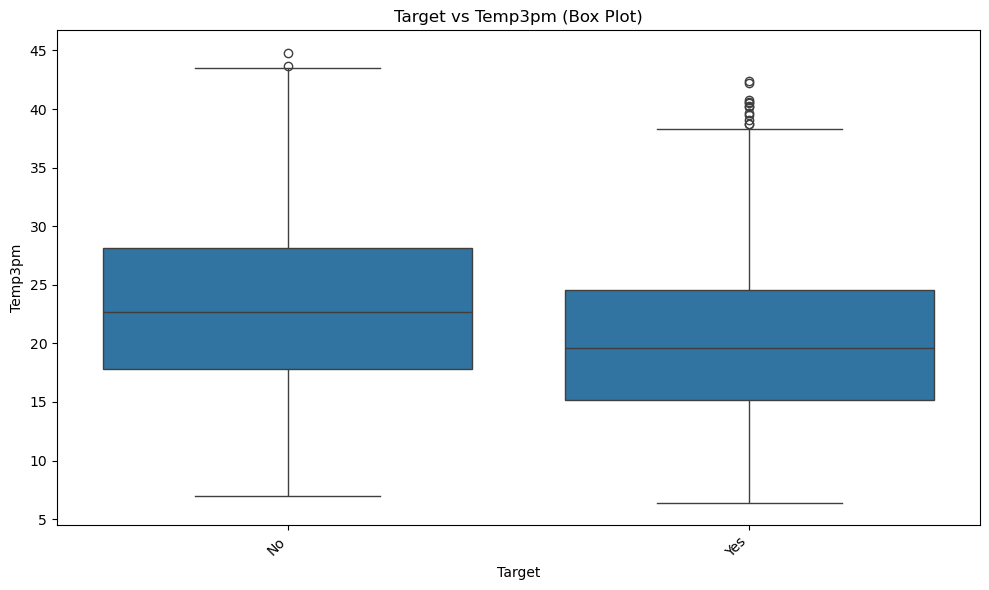

In [6]:
fs.feature_plot(all_selected)


Features selected by at least 2 methods: ['Rainfall', 'Temp3pm', 'MinTemp', 'WindGustSpeed', 'Pressure3pm', 'RainToday', 'MaxTemp', 'WindDir9am', 'WindDir3pm', 'WindSpeed3pm', 'Pressure9am', 'WindSpeed9am', 'Location', 'WindGustDir', 'Temp9am']


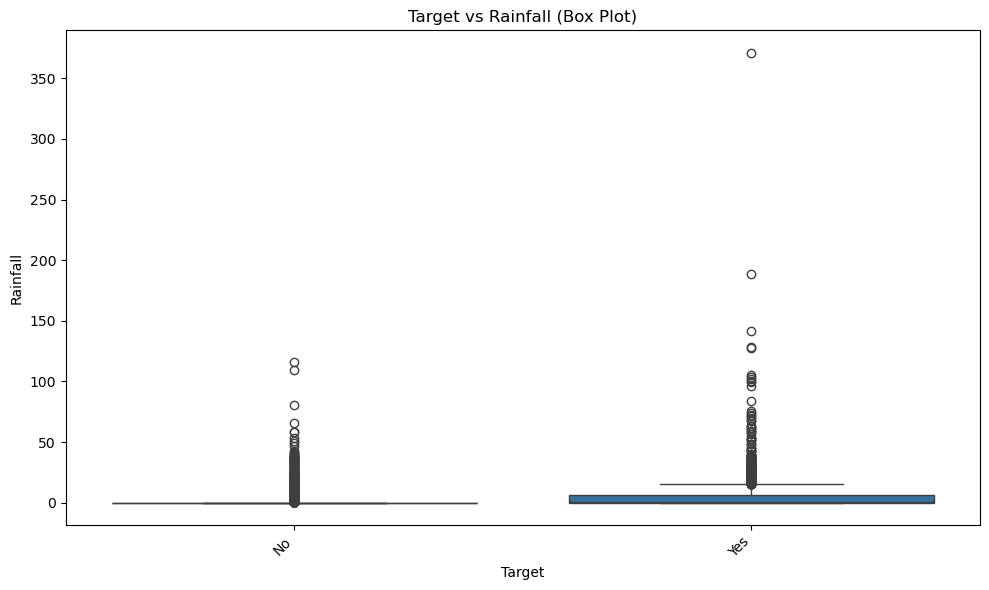

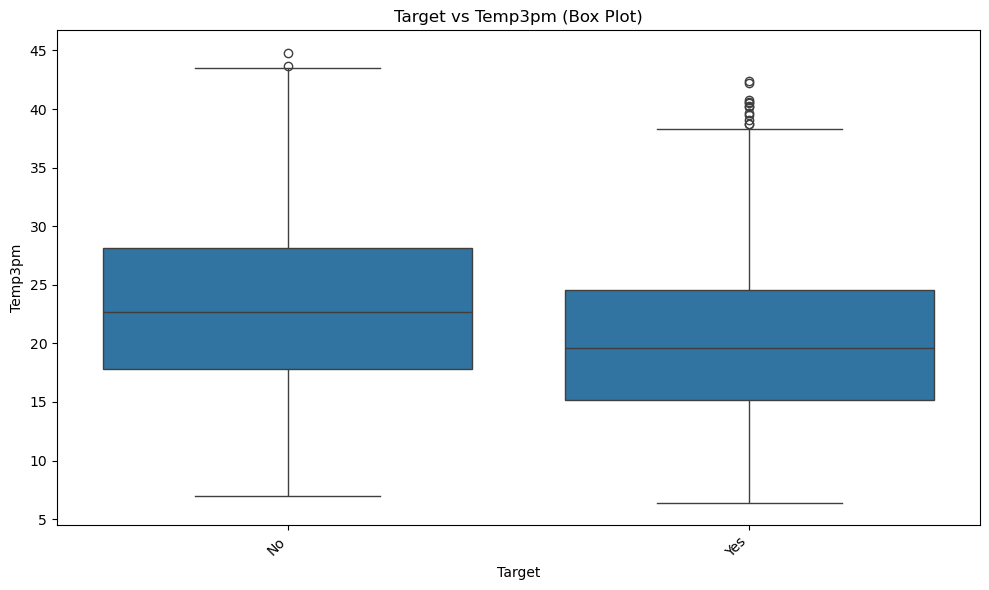

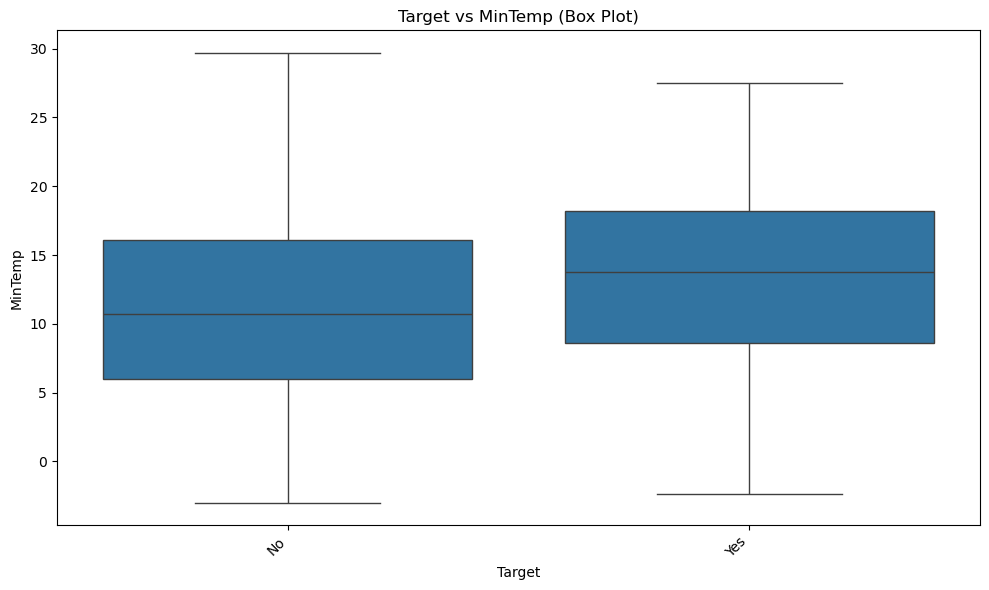

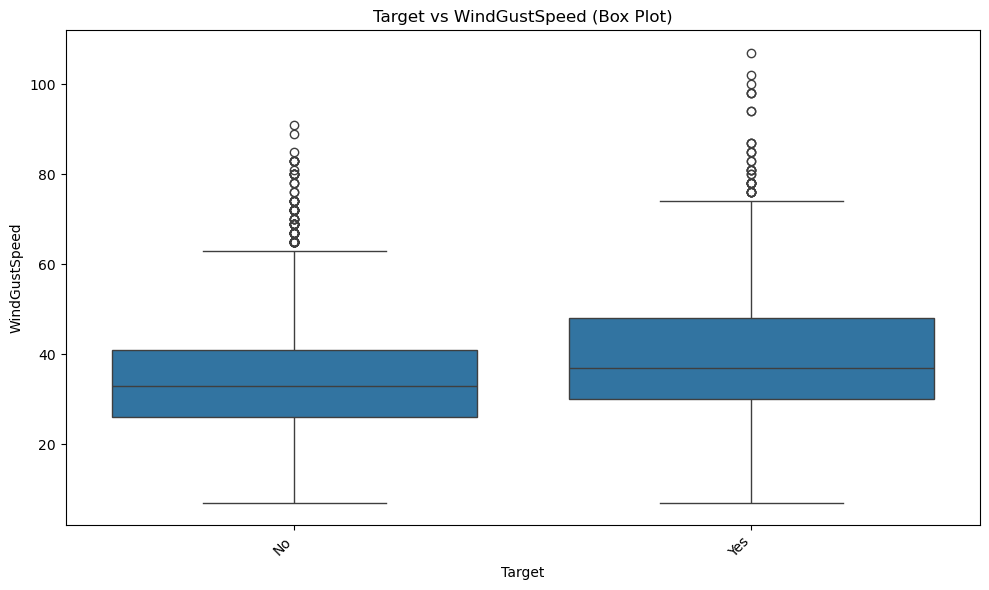

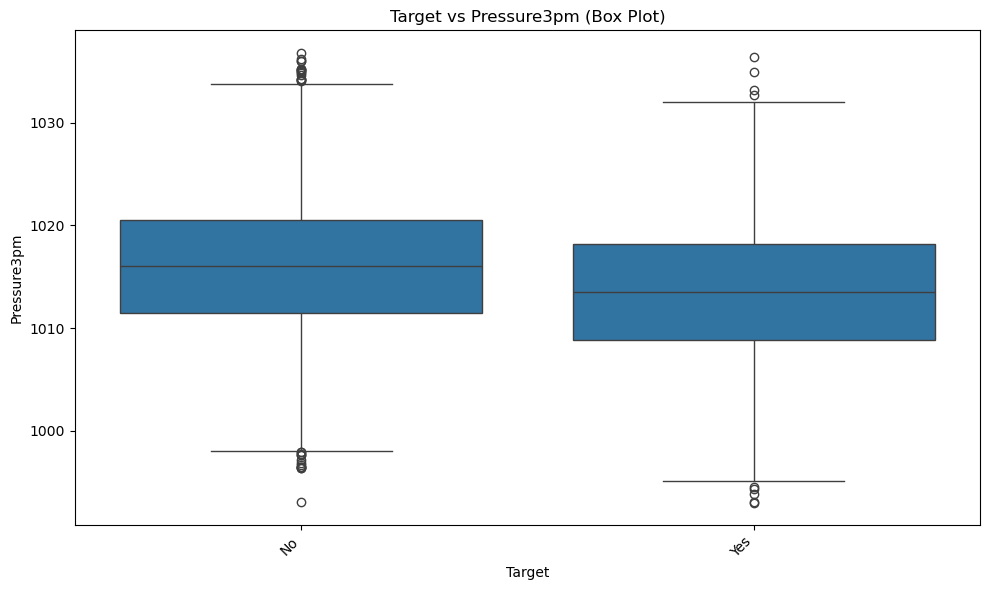

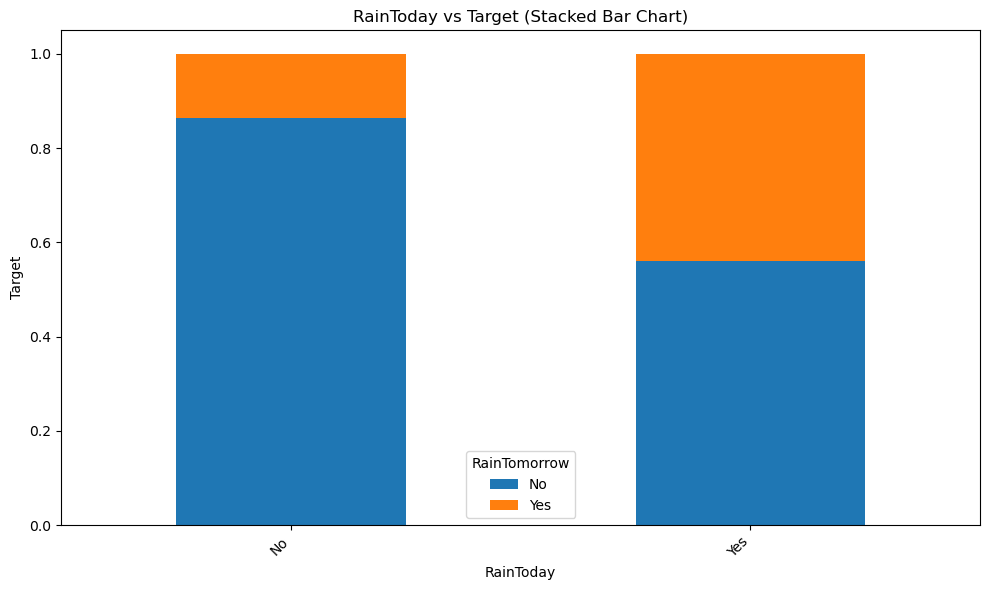

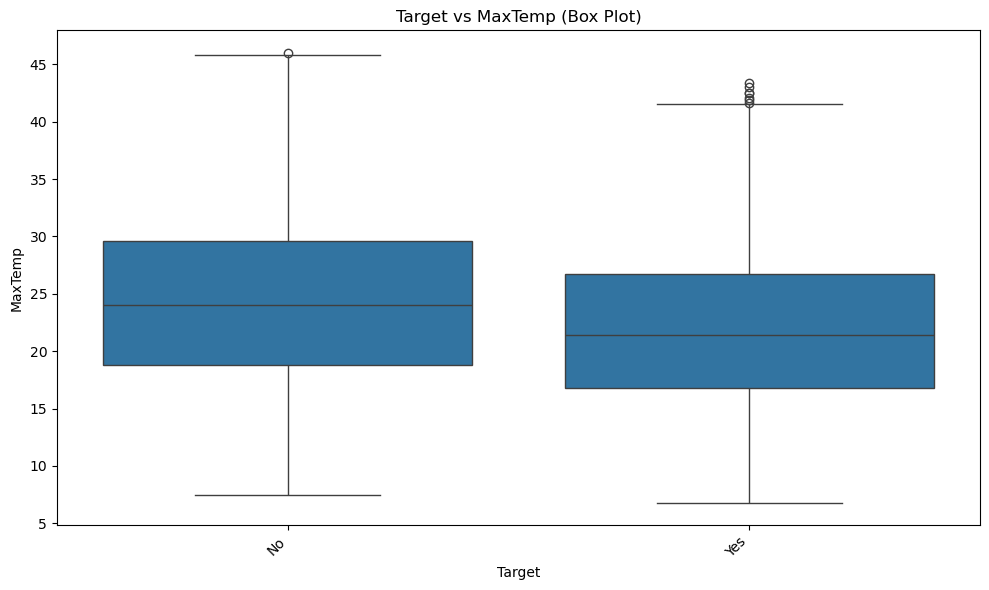

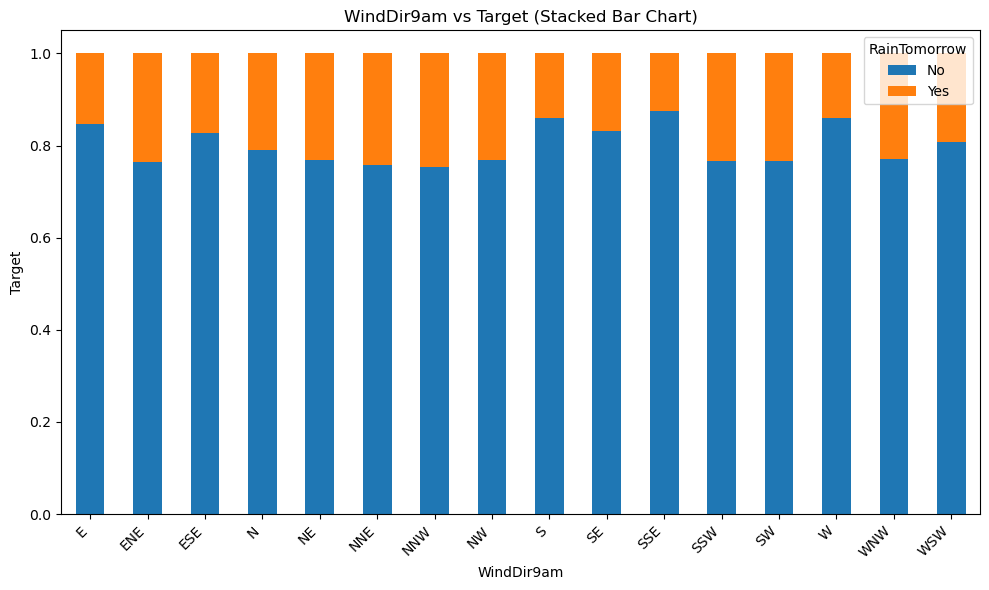

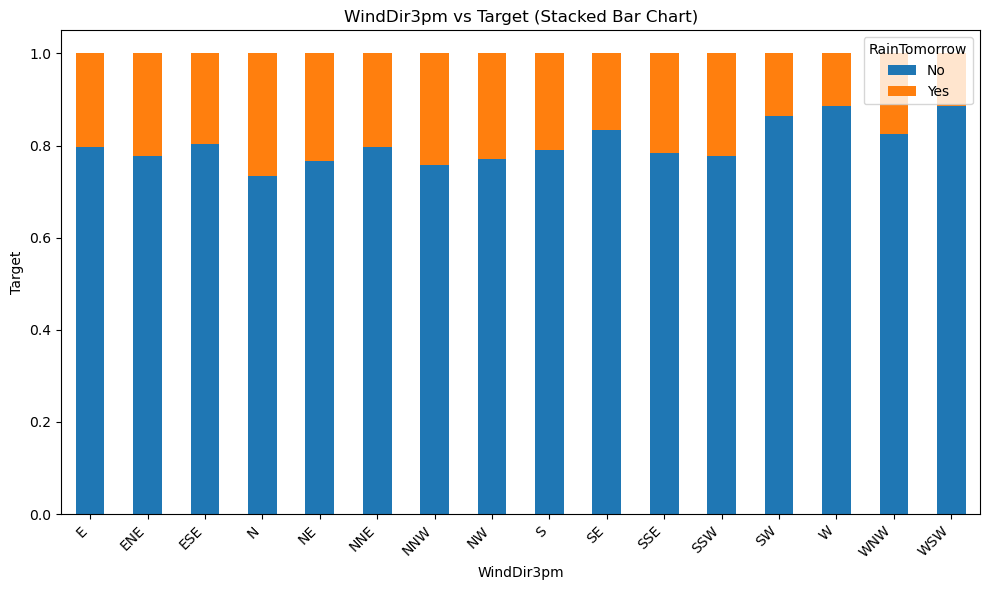

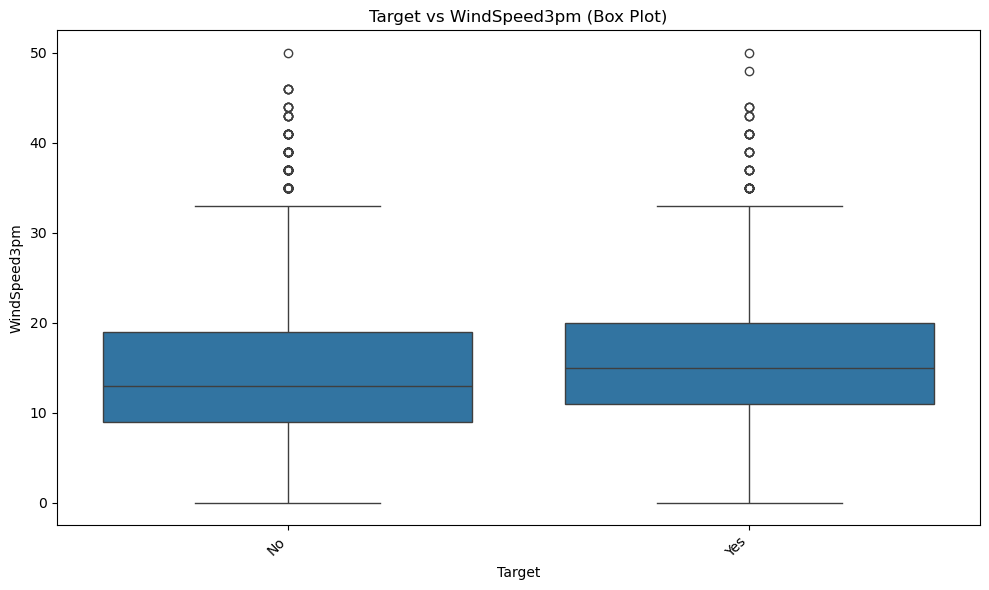

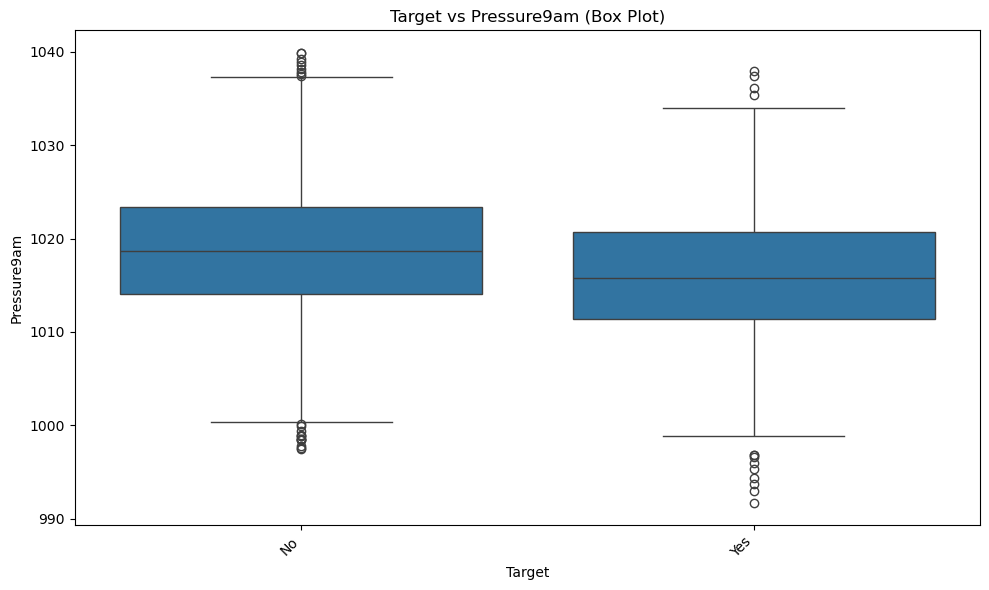

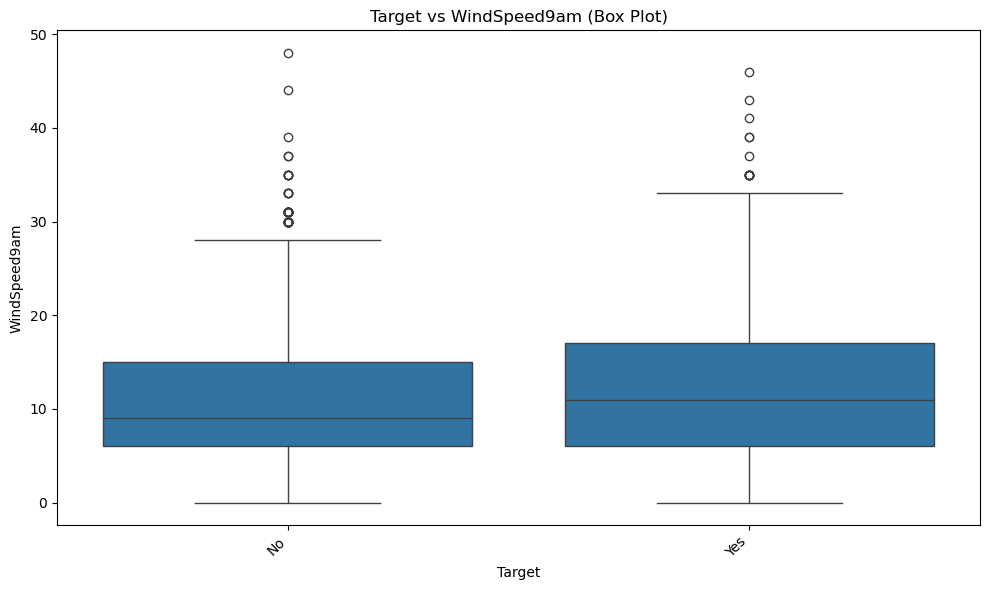

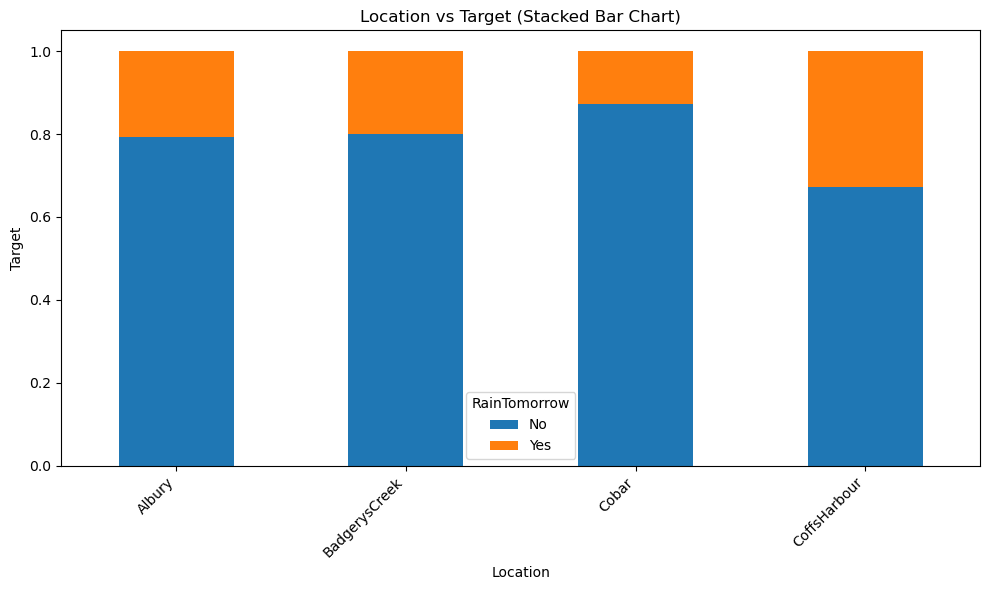

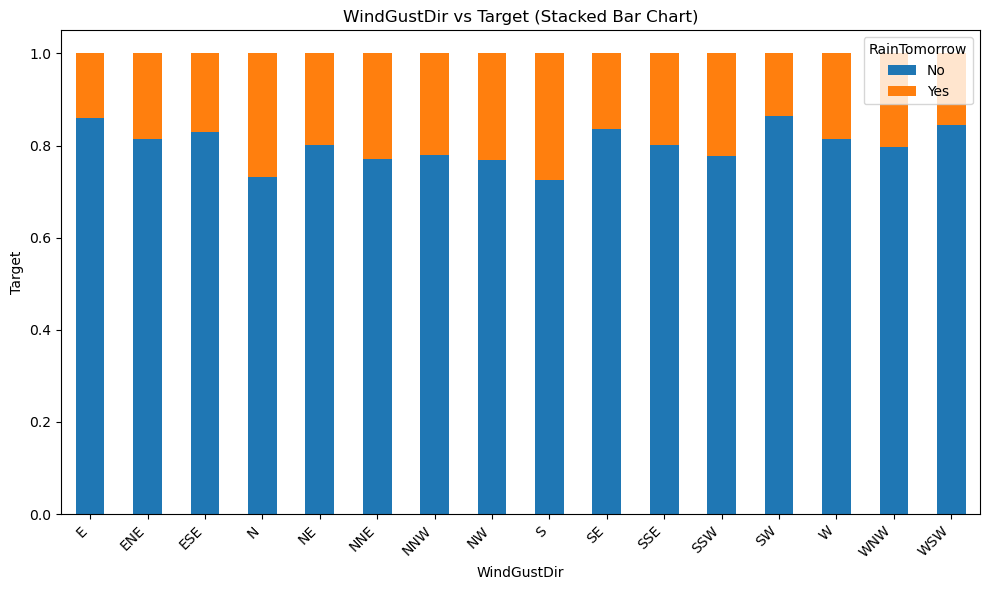

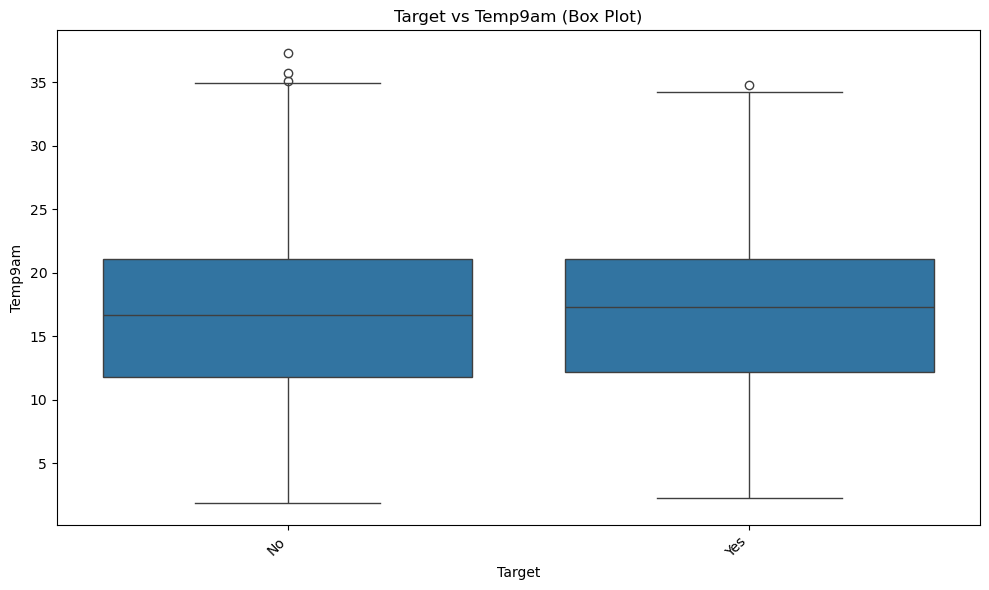

In [7]:
selected_by_2 = fs.selected_by_at_least(2)
print("\nFeatures selected by at least 2 methods:", selected_by_2)

fs.feature_plot(selected_by_2)

In [ ]:
od = OutlierDetector(X_train, y_train)
outliers = od.run_selection()


In [ ]:
nb_pipeline = NaiveBayesPipeline(X_train, y_train, task_type='classification')
nb_pipeline
nb_pipeline.fit()

y_pred = nb_pipeline.predict(X_test)

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pipelines import NaiveBayesPipeline
import miceforest as mf
from feature_selection import FeatureSelector
import feature_selection
from outlier_detection import OutlierDetector
import outlier_detection


df = pd.read_csv('weatherAUStest.csv')
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

nb_pipeline = NaiveBayesPipeline(X_train, y_train, task_type='classification')
nb_pipeline.pipeline

In [2]:
accuracy = np.mean(y_pred == y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.8016


In [ ]:
df = pd.read_csv('weatherAUStest.csv')
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pipelinesV2 import NaiveBayesPipeline
import miceforest as mf
from feature_selection import FeatureSelector
import feature_selection
from outlier_detection import OutlierDetector
import outlier_detection


df = pd.read_csv('weatherAUStest.csv')
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

nb_pipeline = NaiveBayesPipeline(task_type='classification')
nb_pipeline

NaiveBayesPipeline()

In [2]:
nb_pipeline.fit(X_train, y_train)
y_pred = nb_pipeline.predict(X_test)


Removing rows with missing y values: 108
Unique labels after encoding: [0 1]
Removing rows with missing y values: 0


In [3]:
print(y_pred)

['No' 'No' 'No' ... 'No' 'No' 'No']


In [4]:
accuracy = np.mean(y_pred == y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.8011


In [5]:
nb_pipeline.steps[-1]

('classifier', GaussianNB())

In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'imputer__datasets': [3, 4],
    'imputer__iterations': [3],
    'classifier__gnb__var_smoothing': [1e-9],
}

grid_search = GridSearchCV(nb_pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Score: ", grid_search.best_score_)
print("Best Params: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

TypeError: '<' not supported between instances of 'float' and 'str'

In [1]:
from pipelinesV2 import GLMPipeline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import miceforest as mf
from feature_selection import FeatureSelector
import feature_selection
from outlier_detection import OutlierDetector
import outlier_detection

df = pd.read_csv('weatherAUStest.csv')
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

glm_pipeline = GLMPipeline(task_type='classification')
glm_pipeline

GLMPipeline(steps=[('remove_missing_y', RemoveMissingYValues()),
                   ('converter', ColumnTypeConverter()),
                   ('mice_imputer', MICEImputer()),
                   ('preprocessor',
                    ColumnTransformer(transformers=[('num',
                                                     Pipeline(steps=[('scaler',
                                                                      StandardScaler())]),
                                                     <function GLMPipeline.__init__.<locals>.<lambda> at 0x00000171B50CE710>),
                                                    ('cat',
                                                     Pipeline(steps=[('onehot',
                                                                      OneHotEncoder(handle_unknown='ignore'))]),
                                                     <function GLMPipeline.__init__.<locals>.<lambda> at 0x00000171B50CE0E0>)])),
                   ('classifier', LogisticRegression())])

In [2]:
glm_pipeline[-1]

LogisticRegression()

In [4]:
glm_pipeline[0:3]

GLMPipeline(steps=[('remove_missing_y', RemoveMissingYValues()),
                   ('converter', ColumnTypeConverter()),
                   ('mice_imputer', MICEImputer()),
                   ('preprocessor',
                    ColumnTransformer(transformers=[('num',
                                                     Pipeline(steps=[('scaler',
                                                                      StandardScaler())]),
                                                     <function GLMPipeline.__init__.<locals>.<lambda> at 0x00000171B50CDF30>),
                                                    ('cat',
                                                     Pipeline(steps=[('onehot',
                                                                      OneHotEncoder(handle_unknown='ignore'))]),
                                                     <function GLMPipeline.__init__.<locals>.<lambda> at 0x00000171B50CE4D0>)])),
                   ('classifier', LogisticRegression())],
            task_type=[('remove_missing_y', RemoveMissingYValues()),
                       ('converter', ColumnTypeConverter()),
                       ('mice_imputer', MICEImputer())])

In [3]:
X_train_processed = glm_pipeline[0].fit_transform(X_train)

In [4]:
len(glm_pipeline)

5

In [2]:
glm_pipeline.fit(X_train, y_train)
y_pred = glm_pipeline.predict(X_test)


In [3]:
accuracy = np.mean(y_pred == y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.8569


In [4]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'mice_imputer__datasets': [3, 4],
    'classifier__C': [0.5, 1.0]
}

grid_search = GridSearchCV(glm_pipeline, param_grid)
grid_search.fit(X_train, y_train)

print("Best Score: ", grid_search.best_score_)
print("Best Params: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

TypeError: '<' not supported between instances of 'float' and 'str'